In [1]:
# importing diabeties data
import pandas as pd
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/2/adult_income.csv')
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Income level  
0          2174             0              40  United-States        <=50K  
1             0             0 

In [2]:
data.shape

(32561, 15)

In [3]:
data.select_dtypes('int64').columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [4]:
new_data = pd.get_dummies(data)
new_data = new_data.drop(columns = ['workclass_?','education_10th','marital-status_Divorced','occupation_?','relationship_Husband','race_Amer-Indian-Eskimo','sex_Female','native-country_?','Income level_ <=50K'])
print(new_data.shape)

(32561, 101)


In [5]:
# deviding data into features and outcome
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]
print(X.shape, y.shape)

(32561, 100) (32561,)


In [17]:
# dividing dataset into traing and testing dataset
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(26048, 100) (6513, 100)


# Neural Net

In [72]:
nn_clf = MLPClassifier()
nn_clf.fit(X_train,y_train)
print(nn_clf.score(X_test,y_test))

0.7994779671426377


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [73]:
nn_clf.score(X_train,y_train)

0.8000767828006526

In [57]:
# finding optimum parameters of neural net classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier()
parameters = {'activation':['logistic','tanh','relu'], 'hidden_layer_sizes':[(100,),(100,100),(50,),(50,50)]}
nn_clf = MLPClassifier()
gs_clf = GridSearchCV(nn_clf, parameters)
gs_clf.fit(X_train,y_train)
pd.DataFrame(gs_clf.cv_results_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.025914,0.385068,0.041555,0.002617,logistic,"(100,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.767669,0.762741,0.764867,0.765093,0.002018,9
1,3.468382,0.605411,0.060172,0.010374,logistic,"(100, 100)","{'activation': 'logistic', 'hidden_layer_sizes...",0.767813,0.763605,0.761699,0.764373,0.002555,11
2,3.616900,2.131555,0.020499,0.003449,logistic,"(50,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.781057,0.771667,0.759395,0.770707,0.008869,6
3,3.799330,1.729162,0.034035,0.009089,logistic,"(50, 50)","{'activation': 'logistic', 'hidden_layer_sizes...",0.767669,0.761589,0.766739,0.765333,0.002674,8
4,0.791394,0.038678,0.012224,0.004785,tanh,"(100,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.767526,0.759430,0.766739,0.764565,0.003645,10
5,1.643538,0.533874,0.025266,0.002616,tanh,"(100, 100)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.761768,0.772531,0.779122,0.771139,0.007153,5
6,1.336499,1.026127,0.006981,0.004953,tanh,"(50,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.771268,0.764613,0.773074,0.769652,0.003639,7
7,1.077783,0.127592,0.014295,0.001244,tanh,"(50, 50)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.767238,0.782897,0.766883,0.772339,0.007467,4
8,13.165732,1.239232,0.023046,0.005853,relu,"(100,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.818483,0.773395,0.790929,0.794270,0.018559,2
9,28.732762,0.997467,0.042456,0.012465,relu,"(100, 100)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.810998,0.325655,0.787185,0.641280,0.223392,12


In [58]:
print('best parameters: ', gs_clf.best_params_)
print('best train score: ', gs_clf.best_score_)
print("test score: ",gs_clf.score(X_test,y_test))

best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (50,)}
best train score:  0.8050676648430751
test score:  0.3138338707200983


In [71]:
nn_params = pd.DataFrame(gs_clf.cv_results_)
nn_params.to_csv('D:/MSBA/10 Applied Machine Learning/assignment/3/nn_params_2.csv')

In [59]:
# final neural net classifier based on above results
final_nn_clf = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50))
final_nn_clf.fit(X_train,y_train)
print('training accuracy: ',final_nn_clf.score(X_train,y_train))
print('test accuracy: ', final_nn_clf.score(X_test,y_test))

training accuracy:  0.8105864286399846
test accuracy:  0.8091509289114079


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
# creating validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
print(X_train.shape)
print(X_val.shape)

(20838, 100)
(5210, 100)


In [67]:
# checking change in preformance of neural nets with change in number of iterations
train_score, val_score = [],[]

num_iter = [100,125,150,175,200,225,250]

for i in num_iter:
    final_nn_clf.set_params(max_iter = i)
    final_nn_clf.fit(X_train, y_train)
    train_score.append(final_nn_clf.score(X_train,y_train))
    val_score.append(final_nn_clf.score(X_val,y_val))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (175) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

In [68]:
print(train_score, val_score)

[0.786783760437662, 0.8195604184662636, 0.8243593435070544, 0.6810634417890392, 0.2918706209809003, 0.8255590747672521, 0.7985411267875996] [0.781190019193858, 0.8245681381957773, 0.818426103646833, 0.6834932821497121, 0.2946257197696737, 0.8224568138195777, 0.7955854126679462]


([<matplotlib.axis.XTick at 0x1aca83bdec8>,
 <a list of 7 Text xticklabel objects>)

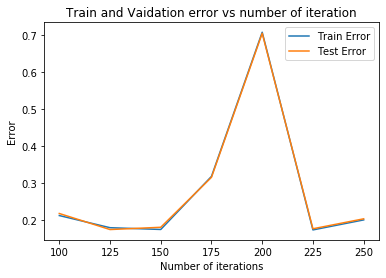

In [74]:
import matplotlib.pyplot as plt

plt.plot(num_iter, [1-i for i in train_score], label = 'Train Error')
plt.plot(num_iter, [1-i for i in val_score], label = 'Test Error')
plt.legend()
plt.title('Train and Vaidation error vs number of iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.xticks(num_iter)

In [86]:
final_nn_clf.set_params(max_iter = 150)
final_nn_clf.fit(X_train,y_train)
final_nn_clf.score(X_test, y_test)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8093044679871028

# KNN

In [85]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
print(knn_clf.score(X_test,y_test))

0.7781360356210656


In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'p':[1,2,3],'algorithm':['auto', 'ball_tree','kd_tree']}
knn_clf = KNeighborsClassifier()
knn_gs = GridSearchCV(knn_clf, param_grid = knn_params)
knn_gs.fit(X_train,y_train)
pd.DataFrame(knn_gs.cv_results_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.091619,0.012310,0.430103,0.034276,auto,1,"{'algorithm': 'auto', 'p': 1}",0.771988,0.775986,0.780562,0.776178,0.003503,2
1,0.117710,0.014919,0.516288,0.026429,auto,2,"{'algorithm': 'auto', 'p': 2}",0.768677,0.778578,0.779266,0.775506,0.004838,5
2,0.098881,0.003777,1.394303,0.025590,auto,3,"{'algorithm': 'auto', 'p': 3}",0.768245,0.778002,0.778834,0.775026,0.004807,7
3,0.095075,0.001883,1.154699,0.054380,ball_tree,1,"{'algorithm': 'ball_tree', 'p': 1}",0.772132,0.775986,0.780706,0.776274,0.003506,1
4,0.106876,0.004580,1.007601,0.079425,ball_tree,2,"{'algorithm': 'ball_tree', 'p': 2}",0.768677,0.778578,0.779410,0.775554,0.004875,4
5,0.389009,0.011917,6.630037,0.172626,ball_tree,3,"{'algorithm': 'ball_tree', 'p': 3}",0.768245,0.778002,0.778834,0.775026,0.004807,7
6,0.085328,0.011949,0.434255,0.018622,kd_tree,1,"{'algorithm': 'kd_tree', 'p': 1}",0.771988,0.775986,0.780562,0.776178,0.003503,2
7,0.078127,0.000030,0.503817,0.007697,kd_tree,2,"{'algorithm': 'kd_tree', 'p': 2}",0.768677,0.778578,0.779266,0.775506,0.004838,5
8,0.079609,0.002093,1.332877,0.038065,kd_tree,3,"{'algorithm': 'kd_tree', 'p': 3}",0.768245,0.778002,0.778834,0.775026,0.004807,7


In [42]:
print('best parameters: ', knn_gs.best_params_)
print('best train score: ', knn_gs.best_score_)
print("test score: ",knn_gs.score(X_test,y_test))

best parameters:  {'algorithm': 'ball_tree', 'p': 1}
best train score:  0.77627411459833
test score:  0.7801320436050975


In [79]:
knn_params = pd.DataFrame(knn_gs.cv_results_)
knn_params.to_csv('D:/MSBA/10 Applied Machine Learning/assignment/3/knn_params2.csv')

In [43]:
# checking change in preformance of neural nets with change in neighbours
knn_train_score, knn_val_score = [],[]

final_knn_clf = KNeighborsClassifier(algorithm = 'ball_tree', p = 1)

k = [2,4,6,8,10,12,14,16,18,20]

for i in k:
    final_knn_clf.set_params(n_neighbors = i)
    final_knn_clf.fit(X_train, y_train)
    knn_train_score.append(final_knn_clf.score(X_train,y_train))
    knn_val_score.append(final_knn_clf.score(X_val,y_val))
    
print(knn_train_score, knn_val_score)

[0.8693732603896727, 0.8370764948651502, 0.8247432575103177, 0.8162011709377099, 0.8112102888952875, 0.8090987618773394, 0.8081869661195892, 0.8069872348593915, 0.8052596218447068, 0.8038679335828774] [0.7840690978886756, 0.7894433781190019, 0.791746641074856, 0.792130518234165, 0.792130518234165, 0.7940499040307102, 0.7948176583493282, 0.7959692898272552, 0.7957773512476007, 0.7959692898272552]


([<matplotlib.axis.XTick at 0x1aca7546f08>,
 <a list of 10 Text xticklabel objects>)

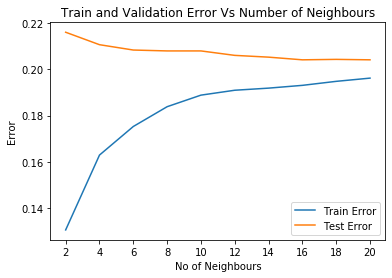

In [80]:
plt.plot(k, [1-i for i in knn_train_score], label = 'Train Error')
plt.plot(k, [1-i for i in knn_val_score], label = 'Test Error')
plt.legend()
plt.title('Train and Validation Error Vs Number of Neighbours')
plt.xlabel('No of Neighbours')
plt.ylabel('Error')
plt.xticks(k)

In [82]:
final_knn_clf.set_params(n_neighbors = 16)
final_knn_clf.fit(X_train,y_train)
final_knn_clf.score(X_test, y_test)

0.801320436050975